### Import Libraries

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..', '..')))

import pandas as pd
from utils import get_areas

In [ ]:
in_path = "/projects/renal/01_kidney_segmentation/semi_supervised/01_mean_teacher/boxes_generation/bbox_csv/Kidney Boxes Only"


labeled_test = pd.read_csv(os.path.join(in_path,"kidney_bbox_labeled_test_set.csv"))
labeled_train = pd.read_csv(os.path.join(in_path,"kidney_bbox_labeled_train_set.csv"))
unlabeled_test = pd.read_csv(os.path.join(in_path,"kidney_bbox_unlabeled_test_set.csv"))
unlabeled_train = pd.read_csv(os.path.join(in_path,"kidney_bbox_unlabeled_train_set.csv"))

In [25]:
area_dict = dict()
dim_dict = dict()
area_dict["labeled test"], dim_dict["labeled test"] = get_areas(labeled_test, "labeled test")
area_dict["labeled train"], dim_dict["labeled train"] = get_areas(labeled_train, "labeled train")
area_dict["unlabeled test"], dim_dict["unlabeled test"] = get_areas(unlabeled_test, "unlabeled test")
area_dict["unlabeled train"], dim_dict["unlabeled train"] = get_areas(unlabeled_train, "unlabeled train")



Patient Renal-CHUS-0055:
box: (8, 103, 73, 15, 44, 27), area: 17820, x: 15, y: 44, z: 27 
box: (6, 110, 134, 20, 36, 33), area: 23760, x: 20, y: 36, z: 33 

Patient Renal-CHUS-0062:
box: (2, 72, 41, 15, 39, 31), area: 18135, x: 15, y: 39, z: 31 
box: (5, 90, 100, 20, 29, 27), area: 15660, x: 20, y: 29, z: 27 

Patient Renal-CHUS-0050:
box: (31, 62, 27, 21, 46, 38), area: 36708, x: 21, y: 46, z: 38 
box: (35, 79, 99, 20, 34, 29), area: 19720, x: 20, y: 34, z: 29 

Patient Renal-CHUS-0073:
box: (0, 75, 35, 19, 40, 32), area: 24320, x: 19, y: 40, z: 32 
box: (1, 73, 96, 24, 37, 41), area: 36408, x: 24, y: 37, z: 41 

Patient Renal-CHUS-0105:
box: (7, 91, 30, 22, 30, 37), area: 24420, x: 22, y: 30, z: 37 
box: (7, 88, 108, 24, 34, 38), area: 31008, x: 24, y: 34, z: 38 

Patient Renal-CHUS-0107:
box: (5, 93, 52, 19, 37, 33), area: 23199, x: 19, y: 37, z: 33 
box: (4, 92, 130, 20, 40, 32), area: 25600, x: 20, y: 40, z: 32 

Patient Renal-CHUS-0061:
box: (5, 92, 47, 22, 35, 36), area: 27720, 

In [23]:
def area_dim_df(area_dict, dim_dict):
    area_df = pd.DataFrame(area_dict)
    dim_df = pd.DataFrame(dim_dict)


    # Merge the two DataFrames into one
    merged_df = pd.concat([area_df, dim_df], axis=1)

    merged_df.columns = ['Areas', 'X', 'Y', 'Z']

    # Print the merged DataFrame
    return merged_df


In [26]:
labeled_test_df = area_dim_df(area_dict['labeled test'], dim_dict['labeled test'])
labeled_train_df = area_dim_df(area_dict['labeled train'], dim_dict['labeled train'])
unlabeled_test_df = area_dim_df(area_dict['unlabeled test'], dim_dict['unlabeled test'])
unlabeled_train_df = area_dim_df(area_dict['unlabeled train'], dim_dict['unlabeled train'])

In [27]:
# Concatenate DataFrames by rows
merged_df = pd.concat([labeled_test_df, labeled_train_df, unlabeled_test_df, unlabeled_train_df], axis=0)

# Reset the index if needed
merged_df.reset_index(drop=True, inplace=True)

merged_df

,Areas,X,Y,Z
0,17820,15,44,27
1,23760,20,36,33
2,18135,15,39,31
3,15660,20,29,27
4,36708,21,46,38
...,...,...,...,...
750,27324,23,36,33
751,38808,22,49,36
752,180,2,10,9
753,49140,26,45,42


In [28]:
import os
out_path = "/projects/renal/01_kidney_segmentation/semi_supervised/01_mean_teacher/boxes_generation/bbox_csv/Kidney Boxes Only"
merged_df.to_csv(os.path.join(out_path, "all_bbox_areas_with_dimensions.csv"), index=False)  


In [6]:
import matplotlib.pyplot as plt
import heapq


# Flatten the lists of areas into a single list
all_areas = [area for areas in area_dict.values() for area in areas]

# Get the 20 largest areas
largest_areas = heapq.nlargest(20, all_areas)

largest_areas


[499200,
 265282,
 171532,
 130680,
 127160,
 120176,
 119560,
 115776,
 113685,
 108750,
 105560,
 104253,
 97020,
 93312,
 91988,
 88704,
 87450,
 84800,
 84535,
 84506]

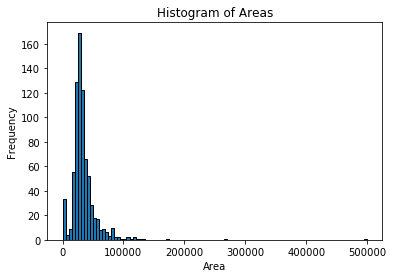

In [5]:
# Plot a histogram
plt.hist(all_areas, bins=100, edgecolor='black')
plt.title('Histogram of Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

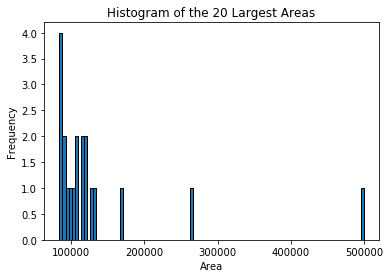

In [47]:
# Get the 20 largest areas
largest_areas = heapq.nlargest(20, all_areas)

# Plot a histogram
plt.hist(largest_areas, bins=100, edgecolor='black')
plt.title('Histogram of the 20 Largest Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

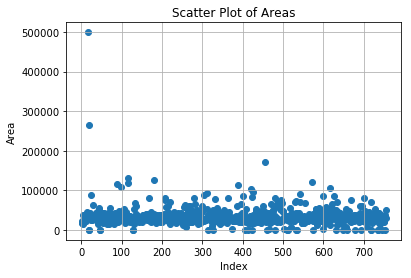

In [51]:
# Create an index for the x-axis
x_values = range(1, len(all_areas) + 1)

# Plot a scatter plot
plt.scatter(x_values, all_areas)
plt.title('Scatter Plot of Areas')
plt.xlabel('Index')
plt.ylabel('Area')
plt.grid(True)
plt.show()

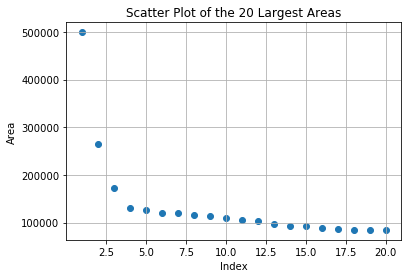

In [50]:
# Create an index for the x-axis
x_values = range(1, len(largest_areas) + 1)

# Plot a scatter plot
plt.scatter(x_values, largest_areas)
plt.title('Scatter Plot of the 20 Largest Areas')
plt.xlabel('Index')
plt.ylabel('Area')
plt.grid(True)
plt.show()

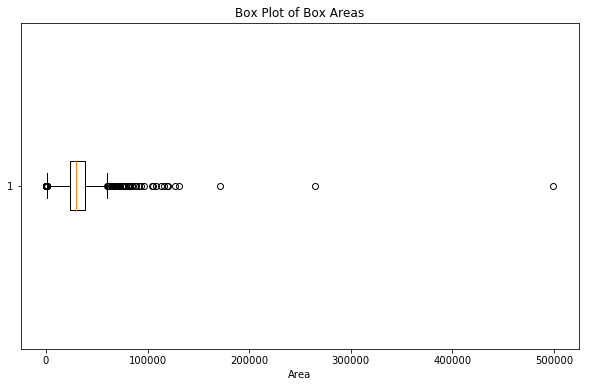

In [57]:
plt.figure(figsize=(10, 6))
plt.boxplot(all_areas, vert=False)
plt.title('Box Plot of Box Areas')
plt.xlabel('Area')
plt.show()

Q1: 23562.0
Median: 29304.0
Q3: 38280.0
Lower Whisker: 1485.0
Upper Whisker: 60357.0


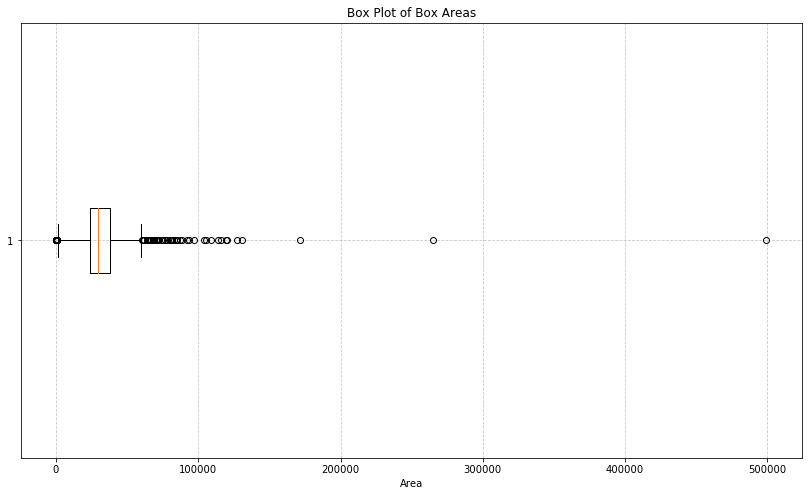

In [77]:
import numpy as np


# Calculate key statistics for annotation
q1 = np.percentile(all_areas, 25)
median = np.percentile(all_areas, 50)
q3 = np.percentile(all_areas, 75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Create a box plot
plt.figure(figsize=(14, 8))
plt.boxplot(all_areas, vert=False)
plt.title('Box Plot of Box Areas')
plt.xlabel('Area')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate the plot with key statistics
print(f'Q1: {q1}')
print(f'Median: {median}')
print(f'Q3: {q3}')
print(f'Lower Whisker: {lower_whisker}')
print(f'Upper Whisker: {upper_whisker}')

plt.show()
